<a href="https://colab.research.google.com/github/rupyab/Airbnb-Booking-Analysis/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    -Unsupervised ML - Book Recommendation System
##### **Name**    - Rupesh Bangar


# **Project Summary -**

Business Context

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant.

items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

Dataset Description

The Book-Crossing dataset comprises 3 files.

Users:

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

Books:

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

Ratings:

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Understanding the Dataset and problem statement

Performing necessary preprocessing steps to convert raw data into usable one.

Modeling- Develop a recommender system which would accurately give book recommendations to the users.

Brief note on how your project is useful to stakeholders?

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
b= pd.read_csv('Books.csv')
u= pd.read_csv('Users.csv')
r= pd.read_csv('Ratings.csv')

### Dataset First View

In [3]:
# Dataset First Look
print("Books Dataset")
display(b.head())
print("Users Dataset")
display(u.head())
print("Ratings Dataset")
display(r.head())


Books Dataset


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Users Dataset


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Ratings Dataset


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("Books Dataset")
print(b.shape)
print("Users Dataset")
print(u.shape)
print("Ratings Dataset")
print(r.shape)

Books Dataset
(271360, 8)
Users Dataset
(278858, 3)
Ratings Dataset
(1149780, 3)


### Dataset Information

In [5]:
# Dataset Info
print("Books Dataset:")
print(b.info())
print('--------------------------------------------------------')
print("Users Dataset:")
print(u.info())
print('--------------------------------------------------------')
print("Ratings Dataset:")
print(r.info())

Books Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
--------------------------------------------------------
Users Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-n

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print("Books Dataset:")
print(b.duplicated().sum())
print('------------------')
print("Users Dataset:")
print(u.duplicated().sum())
print('-------------------')
print("Ratings Dataset:")
print(r.duplicated().sum())

Books Dataset:
0
------------------
Users Dataset:
0
-------------------
Ratings Dataset:
0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print("Books Dataset:")
print(b.isnull().sum())
print('------------------')
print("Users Dataset:")
print(u.isnull().sum())
print('-------------------')
print("Ratings Dataset:")
print(r.isnull().sum())

Books Dataset:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
------------------
Users Dataset:
User-ID          0
Location         0
Age         110762
dtype: int64
-------------------
Ratings Dataset:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


### What did you know about your dataset?

The Book-Crossing dataset comprises 3 files.

Users:

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

Books:

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

Ratings:

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.



## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
print("Books Dataset Columns:")
print(b.columns)
print('------------------')
print("Users Dataset Columns:")
print(u.columns)
print('-------------------')
print("Ratings Dataset Columns:")
print(r.columns)

Books Dataset Columns:
Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
------------------
Users Dataset Columns:
Index(['User-ID', 'Location', 'Age'], dtype='object')
-------------------
Ratings Dataset Columns:
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [9]:
# Dataset Describe
print("Books Dataset:")
print(b.describe())
print('----------------------------')
print("Users Dataset:")
print(u.describe())
print('----------------------------')
print("Ratings Dataset:")
print(r.describe())

Books Dataset:
              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271358               271360   
unique      271360          242135           102022                  202   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   

### Variables Description

### **Books Dataset:**

**ISBN:** Unique identifier for each book (International Standard Book Number).

**Book_Title:** The title of the book.

**Book_Author:** The name of the author who wrote the book.

**Year_Of_Publication**: The year the book was published.

**Publisher:** The name of the company that published the book.

**Image_URL_S:** URL for a small-sized image of the book cover.


**Image_URL_M:** URL for a medium-sized image of the book cover.

**Image_URL_L:** URL for a large-sized image of the book cover.

### **Users Dataset:**

**User_ID:** A unique identifier for each user.

**Location:** The city, state, and country where the user resides.

**Age:** The age of the user, if available.

### **Ratings Dataset**:

**User_ID**: A unique identifier for each user, used to match with the Users dataset.

**ISBN**: The unique identifier for the book, used to match with the Books dataset.

**Book_Rating**: A numerical rating (usually between 0 and 10) given by the user to the book.

### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
print("Books Dataset:")
print(b.nunique())
print('----------------------------')
print("Users Dataset:")
print(u.nunique())
print('----------------------------')
print("Ratings Dataset:")
print(r.nunique())

Books Dataset:
ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64
----------------------------
Users Dataset:
User-ID     278858
Location     57339
Age            165
dtype: int64
----------------------------
Ratings Dataset:
User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.
user= u.drop('Age', axis=1)

In [12]:
print('Users:')
print(user.isnull().sum())
print('------------------')
print('Ratings')
print(r.isnull().sum())
print('-------------------')
print('Books')
print(b.isnull().sum())

Users:
User-ID     0
Location    0
dtype: int64
------------------
Ratings
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
-------------------
Books
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [13]:
# Drop Null Values
user= user.dropna()
r= r.dropna()
b= b.dropna()

### What all manipulations have you done and insights you found?

**Removing Null Values:**

Action: All rows with null values have been removed from the dataset.

Impact: This ensures that only complete data is kept for analysis, reducing the potential for errors or incomplete insights.

**Removing the Age Column from the Users Dataset:**

Action: The Age column was removed from the Users dataset.

**Insights Derived:**

Completeness of Data:

After removing null values, the dataset is now clean and free from missing information, which improves the accuracy and reliability of further analysis.

User Demographics:

Removing the Age column means demographic factors like age will not be considered in the analysis of user behavior, limiting insights on how different age groups interact with books.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

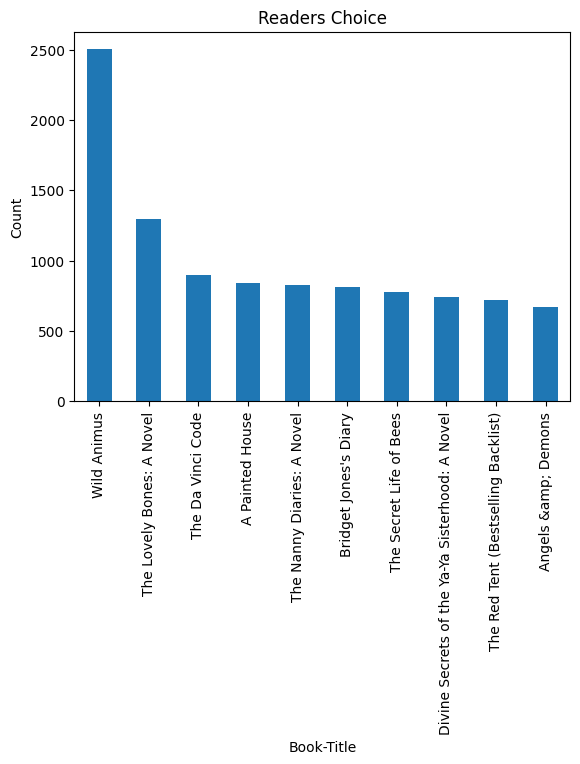

In [14]:
# Chart - 1 Top Books
rb=pd.merge(r,b, how='inner', on='ISBN')
rb.head()
book_cout=rb['Book-Title'].value_counts().head(10)
book_cout.plot(kind='bar')
plt.xlabel('Book-Title')
plt.ylabel('Count')
plt.title('Readers Choice')
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart is an appropriate choice for this data because it visually represents the frequency of each book title. The horizontal axis lists the book titles, and the vertical axis represents the count of readers who chose each book. This format makes it easy to compare the popularity of different books at a glance.

######2. What is/are the insight(s) found from the chart?

The chart provides a clear visual representation of the popularity of each book title.

It highlights the significant popularity of "Wild and Anxious" and suggests a relatively even distribution of reader preferences for the other titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights**

Targeted Marketing: The chart can help identify which books are most popular among readers. This information can be used to target marketing efforts towards these titles, increasing the likelihood of sales and promoting them to a wider audience.

Content Recommendations: The chart can be used to recommend similar books to readers. By suggesting titles that are popular and align with a reader's preferences, retailers can increase customer satisfaction and encourage repeat purchases.

Negative implications
Overreliance on Popularity: If a retailer becomes overly reliant on the most popular titles, they may miss out on opportunities to discover and promote new or less popular books that could have a significant impact on their business.



#### Chart - 2

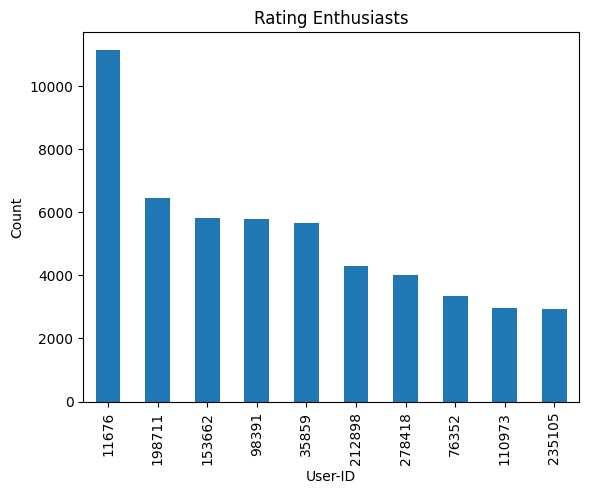

In [15]:
# Chart - 2 Top Users
user_cout=rb['User-ID'].value_counts().head(10)
user_cout.plot(kind='bar')
plt.xlabel('User-ID')
plt.ylabel('Count')
plt.title('Rating Enthusiasts')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was the most suitable choice for this data because it effectively compares the frequencies of different User IDs. The horizontal axis lists the User IDs, and the vertical axis represents the count of ratings each user has provided. This format allows for easy visual comparison of the rating activity among different users.

##### 2. What is/are the insight(s) found from the chart?

User Activity: There's a significant variation in the number of ratings provided by different users.

Top Raters: User ID 11676 stands out as the most active user, providing significantly more ratings than others.

Clustering: The chart also reveals clusters of users with similar levels of rating activity. For instance, there's a group of users with ratings between 100,000 and 200,000

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted User Engagement: By identifying highly active users, a business can tailor marketing strategies or offer exclusive benefits to foster loyalty and encourage further engagement.

Community Building: Recognizing and promoting top raters can create a sense of community and encourage other users to participate more actively.

Data-Driven Recommendations: Analyzing user rating patterns can help refine recommendation systems, providing more personalized and relevant suggestions.

However, there's a potential negative aspect:

Over-reliance on Top Raters: If a business becomes overly dependent on a small group of highly active users, it may miss out on valuable feedback from a wider range of customers. This could lead to skewed product or service assessments and hinder innovation.

#### Chart - 3

<Figure size 500x100 with 0 Axes>

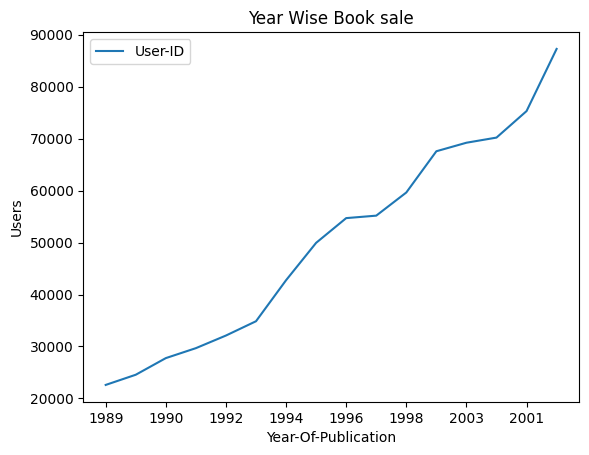

In [16]:
# Chart - 3 Year Wise Book sale
rb=rb[rb['Year-Of-Publication']!=0]
year_sale=rb.groupby('Year-Of-Publication')['User-ID'].count().sort_values().reset_index()
ys=year_sale[year_sale['User-ID']>20000]
plt.figure(figsize=(5,1))
ys.plot(x='Year-Of-Publication',y='User-ID',kind='line')
plt.xlabel('Year-Of-Publication')
plt.ylabel('Users')
plt.title('Year Wise Book sale')
plt.show()


##### 1. Why did you pick the specific chart?

A line chart was the most appropriate choice for this data because it effectively visualizes the trend of book sales over time. The horizontal axis represents the Year-of-Publication, and the vertical axis displays the number of Users. This format allows for easy observation of the growth or decline in book sales across different years.

##### 2. What is/are the insight(s) found from the chart?

There's a clear upward trend in book sales over the years.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Product Strategy: By understanding the historical sales trends, businesses can make informed decisions about which genres or authors to focus on.
Marketing Campaigns: The chart can help identify optimal times for marketing campaigns and promotions based on peak sales periods.
Inventory Management: Predicting future sales trends can aid in inventory planning, ensuring sufficient stock levels to meet demand.

However, there's a potential negative aspect:

Overreliance on Past Trends: If a business becomes overly reliant on past trends without considering other factors (e.g., changing consumer preferences, economic conditions), it may miss out on opportunities or face challenges.

#### Chart - 4

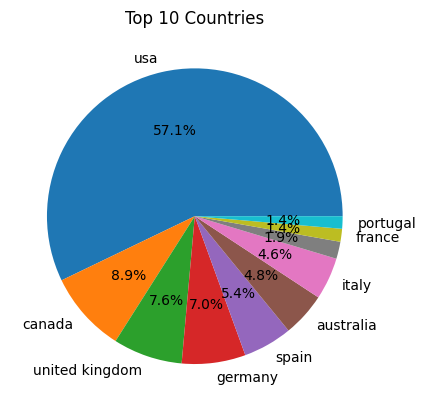

In [17]:
# Chart - 4 Top 10 country
# Extract country from the Location column
user['Country'] =user['Location'].apply(lambda x: x.split(',')[-1].strip())
users=user['Country'].value_counts().head(10)
plt.pie(users, labels=users.index, autopct='%1.1f%%')
plt.title('Top 10 Countries')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart was the most suitable choice for this data because it effectively represents the relative proportions of each country in the overall total. The size of each slice indicates the percentage of the total represented by that country, making it easy to compare contributions visually.

##### 2. What is/are the insight(s) found from the chart?

Dominance of the USA: The USA occupies the largest slice of the pie, representing a significantly higher percentage (57.1%) compared to all other countries.

Regional Distribution: The chart reveals a concentration of countries from North America, Europe, and Oceania, with a limited representation from other regions.

Smaller Contributions: Several countries, including Portugal, France, and Italy, have relatively small percentages, indicating their lesser contributions to the overall total.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Market Targeting: The chart can help businesses identify key markets with the highest potential for growth and customer acquisition.

Product Localization: Understanding the distribution of countries can guide businesses in tailoring their products or services to specific regional preferences.

Global Expansion: The chart can inform decisions about expanding into new markets based on the relative size and potential of each country.

However, there's a potential negative aspect:

Overreliance on the Dominant Market: If a business becomes overly dependent on the USA, it may be vulnerable to economic fluctuations or changes in consumer preferences within that country.

#### Chart - 5

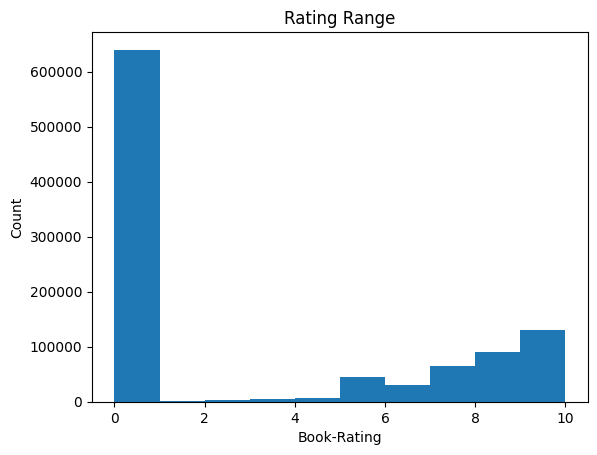

In [18]:
# Rating Range
rb['Book-Rating'].plot(kind='hist')
plt.xlabel('Book-Rating')
plt.ylabel('Count')
plt.title('Rating Range')
plt.show()

##### 1. Why did you pick the specific chart?

Distribution Visualization: It effectively shows the distribution of book ratings across different intervals.

Frequency Representation: The y-axis ("Count") represents the frequency of book ratings within each interval, providing a clear understanding of the data's concentration.

Categorical Data: Book ratings are categorical data, making a histogram suitable for visualizing their distribution.


##### 2. What is/are the insight(s) found from the chart?

Unrated Books: A significant portion of the dataset may consist of books that haven't received any ratings.

Rating Behavior: If a large number of books remain unrated, it could indicate a need to encourage more user engagement and reviews.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Review Campaigns: Implementing strategies to encourage users to leave reviews can improve the quality and quantity of rating data.

Recommendation System: The recommendation system should be adjusted to account for unrated books, potentially suggesting popular or highly-rated books that haven't been reviewed by a specific user

#### Chart - 06 - Pair Plot

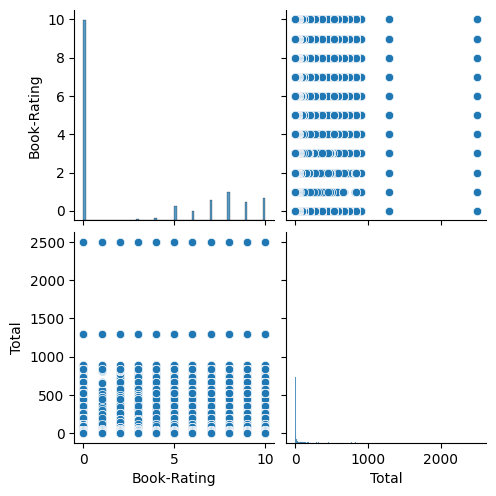

In [19]:
# Pair Plot visualization code
rbu=pd.merge(rb,user, how='inner', on='User-ID')
rbu.head()
user_review_count = rbu.groupby('Book-Title')['User-ID'].count().sort_values().reset_index()
user_review_count.columns = ['Book-Title', 'Total']
pair=pd.merge(rbu, user_review_count, how='inner', on='Book-Title')
sns.pairplot(pair[['Book-Rating','Total']])

##### 1. Why did you pick the specific chart?

To analyze the relationships

##### 2. What is/are the insight(s) found from the chart?

To create a pair plot in Python, you typically need numeric data, and since there are less number of nmumeric data it doesn't any proper insights.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [20]:
# Handling Missing Values & Missing Value Imputation
rbu.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

We have clean the data in EDA process so there are no nul values

### 2. Feature Manipulation & Selection


###Feature Selection

### **For Popularity based Recommendation system**

In [21]:
# Select your features wisely to avoid overfitting
popu=rb.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).reset_index()
popu.columns=['Book-Title','Total Rating']
plr=rb.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).reset_index()
plr.columns=['Book-Title','Average Rating']
plr.head()
popular=pd.merge(popu,plr, how='inner', on='Book-Title')
popular=popular[popular['Total Rating']>200].sort_values('Average Rating',ascending=False).head(50)

##### What all feature selection methods have you used  and why?

Total Rating:

This feature captures the popularity of a book based on how many people have rated it. The more ratings a book has, the more likely it is to be well-known and relevant to a broad audience.

Average Rating:

This feature reflects how well-received a book is by readers. Even if a book is popular (high total ratings), it might not be recommended if its average rating is too low. Therefore, combining both ensures that you recommend books that are not only popular but also well-liked.

##### Which all features you found important and why?


Total Rating:

Why: The total number of ratings a book has received provides insight into its popularity and visibility. Books with more ratings are generally more well-known, which could influence user behavior and further impact average ratings.

Average Rating:

Why: This feature reflects the overall user satisfaction with a book. It is important for understanding how well the book was received, independent of the number of ratings.

### **For Collaborative based Recommendation system**

In [22]:
# Rating Enthusiats
x=rb.groupby('User-ID')['Book-Rating'].count().sort_values(ascending=False).reset_index()
x.columns=['User-ID','Total Rating']
filtered_users=rbu[rbu['User-ID'].isin(x[x['Total Rating']>200]['User-ID'])]
filtered_users.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Country
37,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"strafford, missouri, usa",usa
38,6543,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,"strafford, missouri, usa",usa
39,6543,0385504209,0,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,"strafford, missouri, usa",usa
40,6543,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"strafford, missouri, usa",usa
41,6543,0312966970,0,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312966970.0...,http://images.amazon.com/images/P/0312966970.0...,http://images.amazon.com/images/P/0312966970.0...,"strafford, missouri, usa",usa


In [23]:
# Popular Books
y=filtered_users.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).reset_index()
y.head()
y.columns=['Book-Title','Total Rating']
final=filtered_users[filtered_users['Book-Title'].isin(y[y['Total Rating']>50]['Book-Title'])]
final.shape

(56617, 12)

## ***Popularity Based Recommendation System***

In [29]:
# Top 50 Popular Books
recommended=rbu.merge(popular,how='inner',on='Book-Title').drop_duplicates('Book-Title')
recommended_books=recommended[['Book-Title','Book-Author','Total Rating','Average Rating']]
recommended_books

,Book-Title,Book-Author,Total Rating,Average Rating
0,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,249,5.409639
249,The Lovely Bones: A Novel,Alice Sebold,1295,4.468726
1544,The Da Vinci Code,Dan Brown,898,4.642539
2442,Fahrenheit 451,RAY BRADBURY,409,4.264059
2851,The Red Tent (Bestselling Backlist),Anita Diamant,723,4.334716
3574,The Secret Life of Bees,Sue Monk Kidd,774,4.447028
4348,Life of Pi,Yann Martel,664,4.088855
5012,The Color of Water: A Black Man's Tribute to H...,James McBride,223,4.107623
5235,Outlander,DIANA GABALDON,283,4.173145
5518,1984,George Orwell,266,4.473684


Insights:

So This are most Popular books in the dataset which always recommended for any user

## ***Collaborative Based Recommendation System***

In [25]:
# Collaborative Recommendation System
pivot=final.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pivot.fillna(0,inplace=True)
pivot.shape

(673, 801)

In [26]:
# Cosine Simality
from sklearn.metrics.pairwise import cosine_similarity
similarity_score=cosine_similarity(pivot)
similarity_score[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02890522, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02118677, 0.09673735, 0.08303112,
       0.11153543, 0.05151584, 0.02517784, 0.11706383, 0.        ,
       0.14333793, 0.07936111, 0.06150451, 0.08723968, 0.        ,
       0.07009814, 0.13658681, 0.07600328, 0.12167134, 0.00768046,
       0.01473221, 0.        , 0.07965814, 0.04640011, 0.01556271,
       0.09495938, 0.0182307 , 0.02610465, 0.07984012, 0.11679969,
       0.0569124 , 0.08572773, 0.08471898, 0.08891734, 0.05491435,
       0.0548505 , 0.27777745, 0.09974315, 0.06016046, 0.08958835,
       0.06748675, 0.        , 0.04468098, 0.01920872, 0.        ,
       0.05712542, 0.00557964, 0.07877059, 0.05219479, 0.18908177,
       0.        , 0.01240656, 0.02984572, 0.04279502, 0.12680125,
       0.16566735, 0.        , 0.13357242, 0.06615478, 0.        ,
       0.        , 0.        , 0.10968075, 0.02902972, 0.04521

In [30]:
def recommend(book_name):
  index=np.where(pivot.index==book_name)[0][0]
  similar_items=sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]
  data=[]
  for i in similar_items:
    item=[]
    temp_df=final[final['Book-Title']==pivot.index[i[0]]]
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
    data.append(item)
  return data
movie=input('Enter the book name:')
print('Recommended Books:')
for i in recommend(movie):
  print(i[0])

Enter the book name:1984
Recommended Books:
Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


# **Conclusion**

Book Popularity: The book "Wild and Anxious" stands out as a highly popular title, while reader preferences for other books seem evenly distributed.

User Activity: There is a notable disparity in user engagement, with User ID 11676 being the most active, and clusters of users contributing different volumes of ratings.

Geographic Insights:

USA Dominance: The USA accounts for 57.1% of the user base, dominating book-related activity.
Regional Concentration: The dataset mainly features users from North America, Europe, and Oceania, while countries like Portugal, France, and Italy contribute less.
Unrated Books: A large number of books remain unrated, highlighting the need for initiatives to boost user interaction and book reviews.

Recommendation System: Based on these insights, implementing a collaborative filtering system and a popular book recommendation system would enhance the platform’s ability to recommend books to users effectively.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***